In [0]:
import networkx as nx
import matplotlib.pyplot as plt

from graphframes import GraphFrame

In [0]:
def plot_graph(gf):
  
  gplot = nx.DiGraph()
  edge_labels = {}
  
  plt.figure(figsize=(5, 5))
  for node in gf.vertices.select('id').take(1000):
    gplot.add_node(node['id'])
 
  for row in gf.edges.select('src', 'dst').take(1000):
    gplot.add_edge(row['src'], row['dst'])
       
  pos = nx.shell_layout(gplot)
  
  nx.draw(gplot,
          pos,
          with_labels=True, 
          font_weight='bold', 
          node_size=1800, 
          font_size=15, 
          width=2)

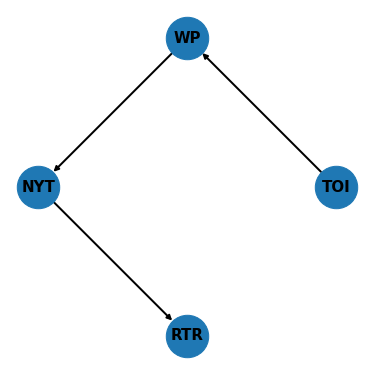

In [0]:
vertices = spark.createDataFrame([("NYT", "New York Times"),
                                  ("RTR", "Reuters"),
                                  ("TOI", "Times of India"),
                                  ("WP", "Washington Post")], ["id", "newspaper"])

edges = spark.createDataFrame([("TOI", "WP"),
                               ("WP", "NYT"),
                               ("NYT", "RTR")], ["src", "dst"])

news = GraphFrame(vertices, edges)

plot_graph(news)

In [0]:
rank = news.pageRank(resetProbability=0.15, tol=0.01)
 
display(rank.vertices)

id,newspaper,pagerank
RTR,Reuters,1.4805801983360678
TOI,Times of India,0.4646232921464144
WP,Washington Post,0.8595530904708666
NYT,New York Times,1.195243419046651


In [0]:
display(rank.edges)

src,dst,weight
TOI,WP,1.0
WP,NYT,1.0
NYT,RTR,1.0


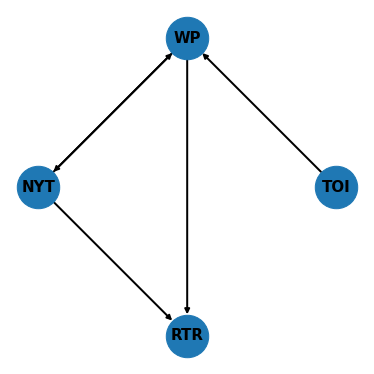

In [0]:
# let's change the order of references
edges = spark.createDataFrame([("TOI", "WP"),
                               ("WP", "RTR"),
                               ("NYT", "WP"),
                               ("WP", "NYT"),
                               ("NYT", "RTR")], ["src", "dst"])

news = GraphFrame(vertices, edges)

plot_graph(news)

In [0]:
# note that page rank depends somehow on the number of incomming links 
rank = news.pageRank(resetProbability=0.15, tol=0.01)
 
display(rank.vertices)

id,newspaper,pagerank
RTR,Reuters,1.3633648554769837
TOI,Times of India,0.4467615049284328
WP,Washington Post,1.2331263725931922
NYT,New York Times,0.9567472670013919


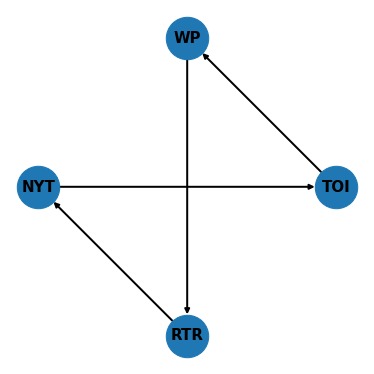

In [0]:
edges = spark.createDataFrame([("TOI", "WP"),
                               ("WP", "RTR"),
                               ("RTR", "NYT"),
                               ("NYT", "TOI")], ["src", "dst"])

news = GraphFrame(vertices, edges)

plot_graph(news)

In [0]:
# in above circular graph each page has the same rank = 1
rank = news.pageRank(resetProbability=0.15, tol=0.01)
 
display(rank.vertices)

id,newspaper,pagerank
RTR,Reuters,1.0
TOI,Times of India,1.0
WP,Washington Post,1.0
NYT,New York Times,1.0
